**과제: 사이킷런의 모델로 실습해보기**




In [ ]:
# 도미(1)와 빙어(0)

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 생선 데이터 준비(넘파이 활용)

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight)) # fish_length, fish_weight를 연결
fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # 타깃데이터 생성

# column_stack = 세로로 리스트 연결 // concatenate = 가로로 리스트 연결

In [ ]:
print(fish_data.shape, fish_target.shape)

(49, 2) (49,)


**데이터 전처리**

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify = fish_target, random_state = 42)
# 훈련 세트와 테스트 세트 분리 // stratify = 클래스의 비율에 맞춘 데이터 분할

mean = np.mean(train_input, axis = 0) # 데이터의 평균
std = np.mean(train_input, axis = 0) # 데이터의 표준편차
print(mean, std)

[ 27.29722222 454.09722222] [ 27.29722222 454.09722222]


In [ ]:
# k-최근접 이웃 모델 훈련 및 평가
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict([[25, 150]]) # 도미(1)가 아닌 빙어(0)로 분류

array([0.])

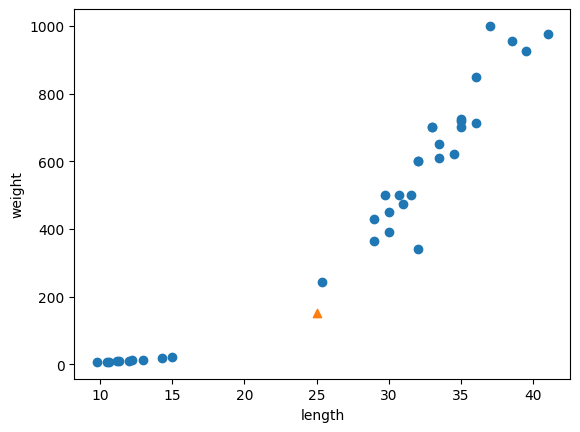

In [ ]:
# 산점도 출력
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^') # 새로운 샘플
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

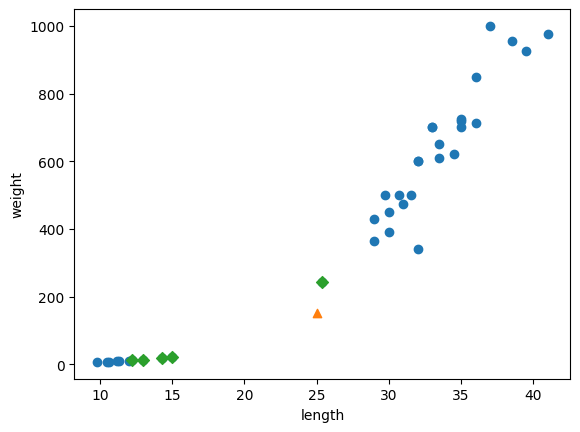

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]]) # 새로운 샘플로부터 가장 가까운 이웃 샘플의 거리와 인덱스 반환

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^') # 새로운 샘플
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
train_input[indexes], distances # 빙어(0)가 더 많은 이웃으로 존재

(array([[[ 25.4, 242. ],
         [ 15. ,  19.9],
         [ 14.3,  19.7],
         [ 13. ,  12.2],
         [ 12.2,  12.2]]]),
 array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]))

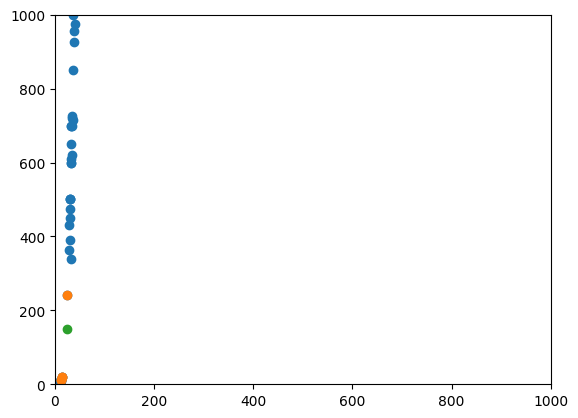

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.scatter(train_input[indexes,0], train_input[indexes,1])
plt.scatter(25, 150)
# x축(길이)와 y축(무게)의 절댓값 차이로 인한 전처리 필요

In [ ]:
train_input[:5]

array([[ 29.7, 500. ],
       [ 12.2,  12.2],
       [ 33. , 700. ],
       [ 11.3,   8.7],
       [ 39.5, 925. ]])

In [ ]:
mean = np.mean(train_input, axis = 0) # 평균 계산
std = np.std(train_input, axis = 0) # 표준편차 계산
# (axis = 0) = 세로축으로 계산 // (axis = 1) = 가로축으로 계산
mean, std

(array([ 27.29722222, 454.09722222]), array([  9.98244253, 323.29893931]))

In [ ]:
train_scaled = (train_input - mean) / std # 표준점수로 변환

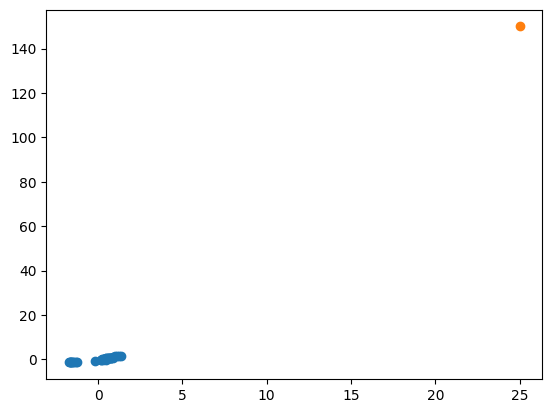

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # 전처리 데이터를 산점도로 출력
plt.scatter(25, 150) # 새로운 샘플, 데이터에 맞게 전처리 필요

In [ ]:
new = ([25, 150] - mean) / std # 전처리
new

array([-0.23012627, -0.94060693])

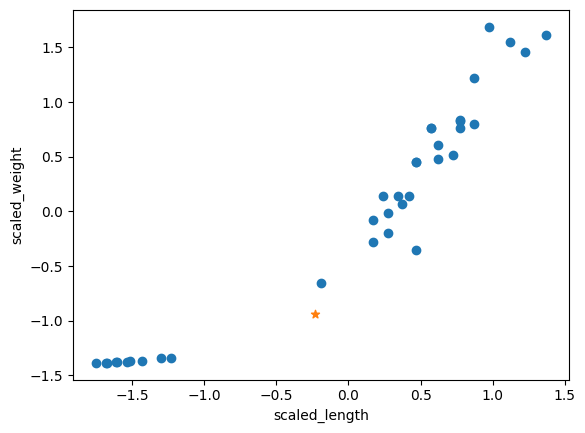

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '*')
plt.xlabel('scaled_length')
plt.ylabel('scaled_weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target) # 전처리 데이터로 훈련
test_scaled = (test_input - mean) / std # 테스트 세트의 스케일 변환

kn.score(test_scaled, test_target) # 평가

1.0

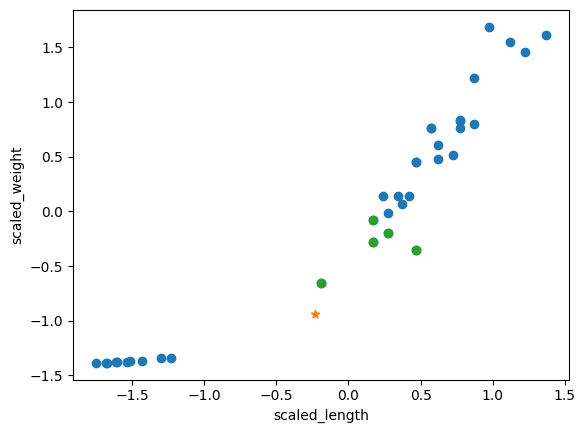

In [ ]:
# 전처리 데이터의 이웃 샘플 출력
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '*')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1])
plt.xlabel('scaled_length')
plt.ylabel('scaled_weight')
plt.show()

**회귀**

In [ ]:
# 농어의 길이와 높이, 두께로 무게 예측하기

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

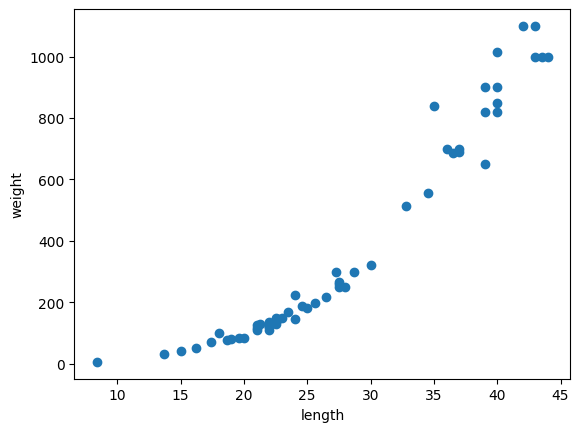

In [ ]:
# 산점도 출력
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)
# 훈련 세트와 테스트 세트 분리

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)
# 1차원 배열의 데이터를 2차원으로 변환(사이킷런의 훈련세트는 2차원 형태여야함)

(42, 1) (14, 1)


In [ ]:
# K-최근접 이웃 회귀 // KNeighborsClassifier와 유사한 형태

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
# 결정 계수 // 회귀 모델의 평가의 척도
test_pred = knr.predict(test_input)
test_pred # 회귀 예측값 출력

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_target, test_pred)
mae # 평균 절댓값 오차 계산 // 약 19g

19.157142857142862

In [ ]:
# 이웃의 수를 줄여서 국지적인 패턴에 민감하게 적응시킴
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [ ]:
# K-최근접 이웃 회귀의 한계

distances, indexes = knr.kneighbors([[50]]) # 길이가 50인 농어의 이웃
print(distances, indexes)
print(knr.predict([[50]])) # 길이가 50인 농어의 예상 무게

[[6. 7. 7.]] [[34  8 14]]
[1033.33333333]


In [ ]:
distances, indexes = knr.kneighbors([[100]]) # 길이가 100인 농어의 이웃
print(distances, indexes)
print(knr.predict([[100]])) # 길이가 100인 농어의 예상 무게

[[56. 57. 57.]] [[34  8 14]]
[1033.33333333]


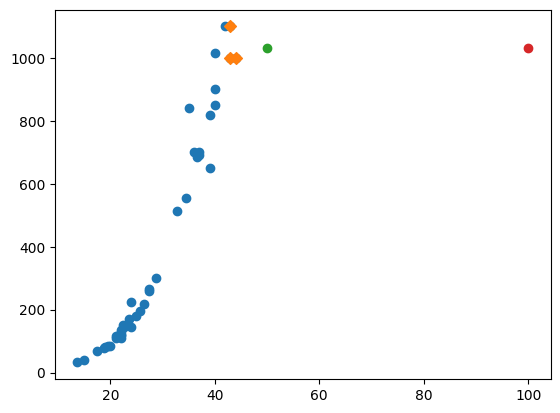

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033)
plt.scatter(100, 1033)
plt.show()
# K-최근접 이웃 회귀의 원리에 따라 농어의 길이가 증가하여도 무게가 더 늘어나지 않음

In [ ]:
# 선형 회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target) # 선형 회귀 모델 훈련

lr.predict([[50], [100]]) # 길이가 50, 100인 농어의 예측 무게

array([1241.83860323, 3192.69585141])

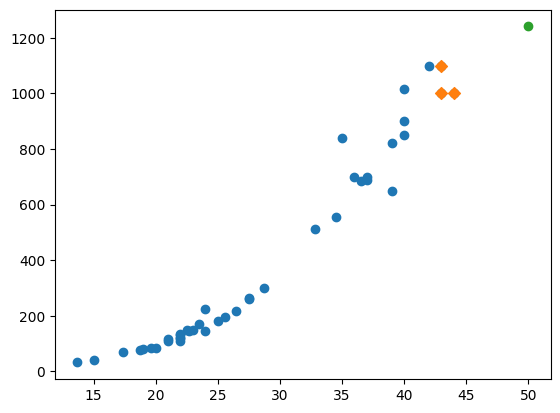

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1241)
plt.show()

In [ ]:
print(lr.coef_, lr.intercept_) # 선형 회귀의 방정식의 사용된 기울기와 절편

[39.01714496] -709.0186449535477


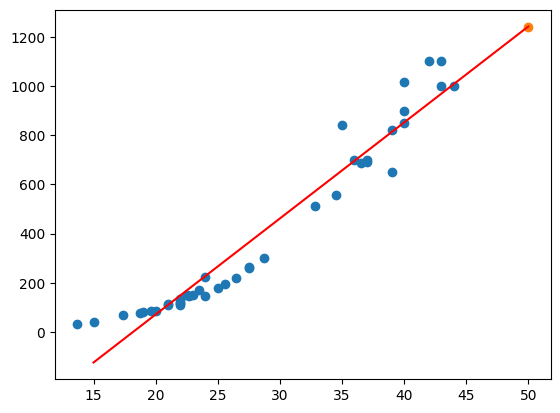

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_], color='red')
# 농어의 길이 15에서 50을 지나는 직선 생성 // 앞에서 구한 기울기와 절편 활용
plt.scatter(50, 1241) # 길이가 50인 농어에 대한 무게 예측값
plt.show()

In [ ]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


In [ ]:
# 선형 회귀 - 다항 회귀 // 이차 함수로 예측하기 위한 특성 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

# 이차방정식을 구성하기 위한 길이를 제곱한 항을 훈련세트에 추가
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
# 가중치의 제곱(특성1), 기울기(특성2), 절편
lr = LinearRegression()

lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [ ]:
lr.predict([[50 ** 2, 50]]) # 일차방정식 대비 높은 값 출력

array([1573.98423528])

In [ ]:
print(lr.score(train_poly, train_target)) # 훈련 세트
print(lr.score(test_poly, test_target)) # 테스트 세트

0.9775935108325122